# Multi terrain probabistic sensing

# About this file

This file is to use the functionalities of the classes defined in the other file.

## Things to be done here

1)

## Things done here

1)

In [102]:
%run a_star_2.ipynb
import numpy as np
%run agent_6.ipynb

import random

In [103]:
maze_size = 5
probability = 0.3

# Code for Agent 6 goes here

In [104]:
def run_agent_6(agent6, maze):
    print("Agent6 started.\nMaze Size: ",maze_size," Source: ",maze.source," Target: ",maze.target)
    source = maze.source
    terrain_matrix = maze.terrain_matrix
    full_grid_world_matrix = maze.full_grid_world_matrix
    agent_gridworld = agent6.agent_gridworld

    target_reached = False
    while not target_reached:
        current_target = agent6.getMaxProbabilityCell(source)
        print('source:', source, "current_target: ",current_target)
        
#             print("astar args: source:",source,"target:",current_target,"gridworld:",agent6.agent_gridworld_0_1 )
        initialize(maze_size,0.3)
        path = astar(source,current_target, agent6.agent_gridworld_0_1)
#         print(path)\
        if(len(path)==0):
            agent6.agent_gridworld_0_1[current_target[0],current_target[1]] = 1
            agent6.update_cells_when_xy_blocked(current_target[0], current_target[1], maze_size)
            agent6.agent_gridworld.itemset(current_target,3)
            maze.full_grid_world_matrix[current_target[0],current_target[1]] =1
            maze.terrain_matrix[current_target[0],current_target[1]] = 3
            continue
        
        for i in range(len(path)):
            node = path[i]
            if full_grid_world_matrix.item(node) == 0:
                terrain_type = terrain_matrix.item(node)
                agent6.agent_gridworld.itemset(node, terrain_type)
                if i == len(path)-1:
                    if(agent6.examine(node, terrain_type, maze)):
                        print("found goal")
                        target_reached = True
                        break
                    else:
                        #update probabiities when failed to be found and terrain type=terrain_matrix.item(node)
                        agent6.update_cells_when_xy_failed_with_some_terrainType(node[0], node[1], terrain_type, maze_size)
                        source = path[i]
                        print(agent6.belief_matrix)
                        break
            elif full_grid_world_matrix.item(node) == 1:
                print(node,'<-cell blocked, replanning route')
                #agent6.update_probabilities(node,'blocked')
                agent6.agent_gridworld_0_1[node[0],node[1]] = 1
                agent6.update_cells_when_xy_blocked(node[0], node[1], maze_size)
                agent6.agent_gridworld.itemset(node,3)
                source = path[i-1]
                print(agent6.belief_matrix)
                break

        
        current_target = source


# Main function

In [105]:
if __name__ == "__main__":

#     source,target=set_valid_source_target()
    maze = gridworld(maze_size)
    initialize(maze_size,0.3)
    print(maze.source,maze.target, maze.full_grid_world_matrix)
    path = astar(maze.source, maze.target, maze.full_grid_world_matrix)
    print("path: ",path)
    while(len(path)==0):
        print("finding valid source and target")
        maze.source, maze.target = maze.set_valid_source_target(maze_size)
        initialize(maze_size,0.3)
        path = astar(maze.source, maze.target, maze.full_grid_world_matrix)
    
    agent6 = agent_6(maze_size)
#     run_agent_6(agent6, maze)

(0, 0) (1, 2) [[0 0 1 0 1]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 1 0 0 0]]
path:  [(0, 0), (0, 1), (1, 1), (1, 2)]


<class 'numpy.matrix'>


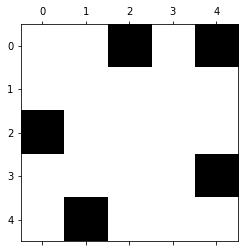

In [106]:
print(type(maze.full_grid_world_matrix))
plt.spy(maze.full_grid_world_matrix)

In [107]:
print(maze.source, maze.target)

(0, 0) (1, 2)


In [108]:
maze.terrain_matrix = np.asmatrix([[0,2,1],[3,3,1],[3,1,2]])
maze.full_grid_world_matrix = np.asmatrix([[0,0,0],[1,1,0],[1,0,0]])
maze.source = (0,0)
maze.target = (2,1)
maze_size = 3
agent6 = agent_6(maze_size)

In [109]:
run_agent_6(agent6, maze)

Agent6 started.
Maze Size:  3  Source:  (0, 0)  Target:  (2, 1)
source: (0, 0) current_target:  (0, 0)
[[0.04761905 0.33333333 0.33333333]
 [0.33333333 0.23809524 0.23809524]
 [0.33333333 0.23809524 0.23809524]]
source: (0, 0) current_target:  (0, 1)
[[0.04761905 0.18918919 0.33333333]
 [0.23648649 0.23809524 0.16891892]
 [0.23648649 0.23809524 0.16891892]]
source: (0, 1) current_target:  (0, 2)
[[0.04761905 0.18918919 0.14936563]
 [0.21193772 0.21337947 0.16891892]
 [0.21193772 0.21337947 0.16891892]]
source: (0, 2) current_target:  (1, 1)
(1, 1) <-cell blocked, replanning route
[[0.06053624 0.18918919 0.1898827 ]
 [0.21193772 0.         0.16891892]
 [0.26942815 0.21337947 0.21474003]]
source: (0, 1) current_target:  (2, 0)
(1, 0) <-cell blocked, replanning route
[[0.06053624 0.24006883 0.24094885]
 [0.         0.         0.16891892]
 [0.26942815 0.27076473 0.27249119]]
source: (0, 0) current_target:  (2, 2)
[[0.11673056 0.4629189  0.24094885]
 [0.         0.         0.16891892]
 [0.2

KeyboardInterrupt: 

In [87]:
print(type(maze.terrain_matrix))

<class 'numpy.matrix'>
